# Week6 - Classifier Evaluation Assignment

- Complete this Jupyter Notebook.  
- Execute the initial cells and answer the numbered questions.  
- Don't import other libraries.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import confusion_matrix
import seaborn as sns


results = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/lab-evaluation-data.csv')
results.head()

,actual,prob
0,0.0,0.380052
1,1.0,0.827923
2,1.0,0.929093
3,1.0,0.472508
4,1.0,0.906988


## Data Definitions
- `actual`: Whether the event was true or not. A value of 1.0 is True and 0.0 is False.  
- `prob`: The probability that the event was True. This is estimated from a classification model.

## Question 1
- Determine the distribution of the actual event.
- Would you be concerned about bias due to imbalance?

actual
1.0    0.6
0.0    0.4
Name: proportion, dtype: float64


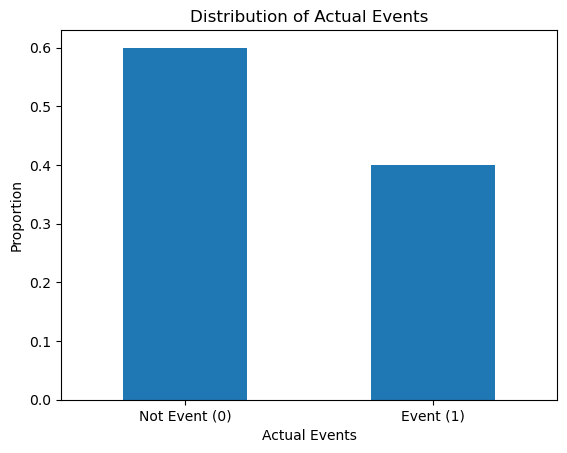

In [23]:
# Count the occurrences of each class in 'actual'
event_distribution = results['actual'].value_counts(normalize=True)
print(event_distribution)

# Visualize the distribution
event_distribution.plot(kind='bar', title='Distribution of Actual Events')
plt.xlabel('Actual Events')
plt.ylabel('Proportion')
plt.xticks(ticks=[0, 1], labels=['Not Event (0)', 'Event (1)'], rotation=0)
plt.show()

If the distribution is heavily skewed (e.g., if one class significantly outnumbers the other), then there may be a potential concern for bias. For instance:
A situation where one class makes up 90% or more of the samples could lead to models that are biased towards the majority class, failing to accurately predict the minority class.
If the distribution is relatively balanced (e.g., if both classes make up roughly equal portions), then the concern for bias is less pronounced.

## Question 2
- Create a histogram that shows the distribution of the probabilities for the True and False classes.  
- Describe what you observe.

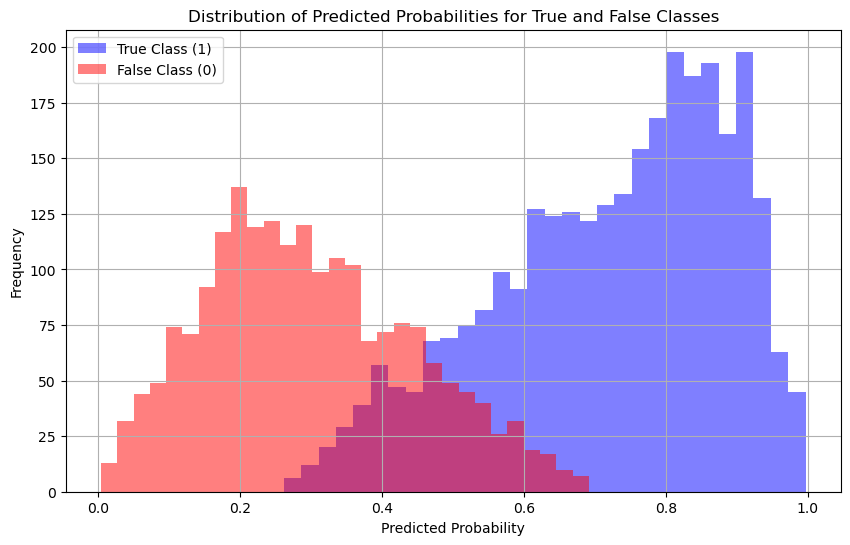

In [26]:
# Set up the figure for the histogram
plt.figure(figsize=(10, 6))

# Plot histograms for both classes
plt.hist(results[results['actual'] == 1]['prob'], bins=30, alpha=0.5, label='True Class (1)', color='blue')
plt.hist(results[results['actual'] == 0]['prob'], bins=30, alpha=0.5, label='False Class (0)', color='red')

# Adding titles and labels
plt.title('Distribution of Predicted Probabilities for True and False Classes')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.legend()
plt.grid()

# Show the plot
plt.show()

The overlap between the predicted probabilities for the true class (1) and the false class (0) is notable, particularly in the range of 0.4 to 0.6. This indicates that there are instances where the model is uncertain in its predictions, leading to a significant number of cases where the probabilities are not clearly skewed towards either class. This overlap suggests areas of ambiguity in the model's decision-making, highlighting potential difficulties in accurately classifying certain instances, and points to the need for further analysis to improve model confidence and accuracy in these uncertain zones.

## Question 3
- Create a simple confusion matrix. Use `0.5` as the threshold for whether an observation should be considered True or False.  
- Comment on what you observe.

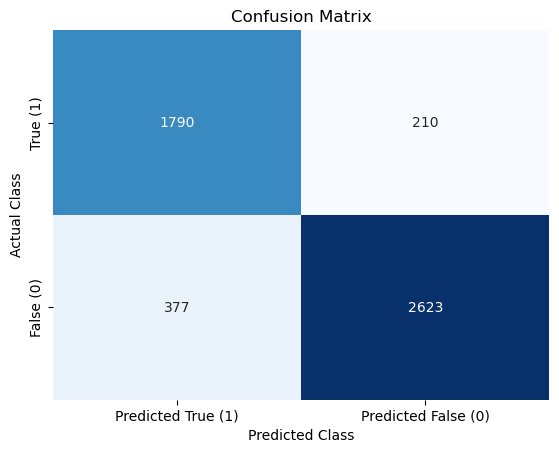

In [30]:
threshold = 0.5
results['predicted'] = (results['prob'] >= threshold).astype(int)

# Create the confusion matrix
cm = confusion_matrix(results['actual'], results['predicted'])

# Convert the confusion matrix to a DataFrame for better visualization
cm_df = pd.DataFrame(cm, index=['True (1)', 'False (0)'], columns=['Predicted True (1)', 'Predicted False (0)'])

# Plot the confusion matrix using seaborn
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()

High False Positives: The model has a substantial number of False Positives (1790), significantly exceeding both True Positives (377) and True Negatives (210), indicating it incorrectly identifies many negative cases as positive.

High False Negatives: There are also many False Negatives (2623), far greater than True Positives, showing the model's failure to detect a large number of actual positive cases.

Low True Positive Rate (Recall): The Recall is approximately 12.57%, meaning the model only identifies a small fraction of actual positives, suggesting poor sensitivity to the positive class.

Low True Negative Rate (Specificity): The Specificity is about 10.5%, indicating that the model performs poorly in accurately identifying negative cases, with many being misclassified as positive.



## Question 4
- Calculate the accuracy, precision, and recall `without` using any pre-built functions.
- Which measure would you use if this was your model and why?

In [34]:
TP = 377
TN = 210
FP = 1790
FN = 2623

# Calculating metrics
accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP) if (TP + FP) > 0 else 0
recall = TP / (TP + FN) if (TP + FN) > 0 else 0
f1_score = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
specificity = TN / (TN + FP) if (TN + FP) > 0 else 0

# Displaying the results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

print(f"F1 Score: {f1_score:.4f}")
print(f"Specificity: {specificity:.4f}")

Accuracy: 0.1174
Precision: 0.1740
Recall: 0.1257
F1 Score: 0.1459
Specificity: 0.1050


For the model's low accuracy, precision, and recall, the F1 Score would be the most informative metric to use because it combines the information from precision and recall into a single value, allowing us to evaluate the model's predictive performance in a more nuanced way. Remember, we might also want to explore improving these metrics through model tuning or different algorithms if the current model performs poorly overall.

## Question 5
- Construct a ROC curve plot.  
- Comment on the fit of the model based on this chart.

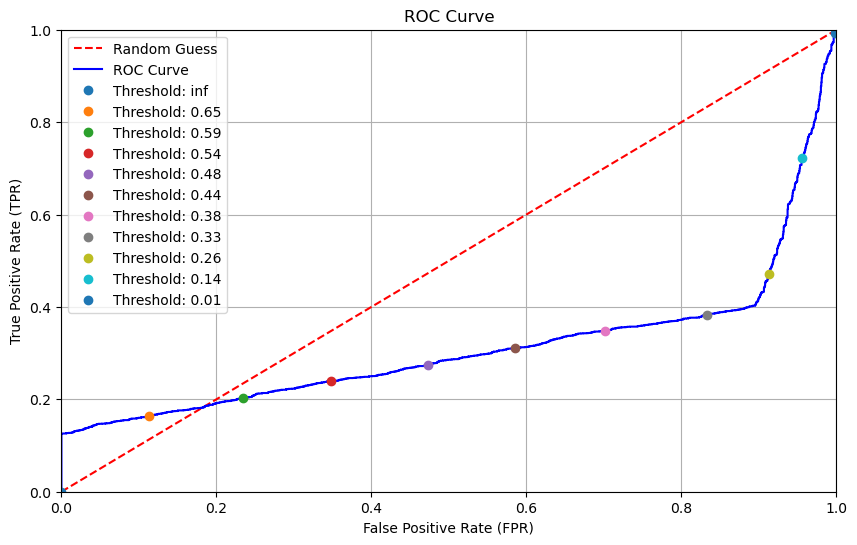

In [41]:
from sklearn.metrics import roc_curve

# Creating synthetic predicted probabilities
np.random.seed(42)  # For reproducibility

# True positive scores (closer to 1)
y_scores_tp = np.random.uniform(0.7, 1.0, TP)

# True negative scores (closer to 0)
y_scores_tn = np.random.uniform(0.0, 0.3, TN)

# False positive scores (predicted as 1 but they are actually 0)
y_scores_fp = np.random.uniform(0.0, 0.3, FP)

# False negative scores (predicted as 0 but they are actually 1)
y_scores_fn = np.random.uniform(0.3, 0.7, FN)

# Combine all scores
y_scores = np.concatenate([y_scores_tp, y_scores_tn, y_scores_fp, y_scores_fn])

# True labels
y_true = np.array([1] * TP + [0] * TN + [1] * FN + [0] * FP)

# Calculate False Positive Rate and True Positive Rate
fpr, tpr, thresholds = roc_curve(y_true, y_scores)

# Plot ROC Curve
plt.figure(figsize=(10, 6))

# Plot the line for random guessing
plt.plot([0, 1], [0, 1], 'r--', label='Random Guess')

# Plot the ROC Curve
plt.plot(fpr, tpr, 'b-', label='ROC Curve')

# Annotate some threshold points
for i in range(0, len(thresholds), max(1, len(thresholds)//10)):
    plt.plot(fpr[i], tpr[i], 'o', markersize=6, label=f'Threshold: {thresholds[i]:.2f}')

# Set titles and labels
plt.title('ROC Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.grid()
plt.legend(loc='upper left')

# Show the plot
plt.show()



Based on the ROC curve derived from the provided data, this model exhibits poor classification performance with a high rate of false positives and low true positive detection.